# Modelo de regresión lineal para 3 simuladores en el aprendizaje de física
* Simulador Presencial "Data Studio"
* Simulador virtual "Laboratorio Virtual"
* Simulador virtual "PhET"

In [249]:
# Librerias utilizadas para el análisis y modelado de datos
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Creación de una base de datos, agregando los correspondientes datos obtenidos en cada simulador

In [250]:
# data: correspondiente a los datos obtenidos del simulador "Data Studio"
data = pd.DataFrame()
data['Tiempo(s)'] = ['0.050','0.100','0.150','0.200','0.250']
data['Posición(m)'] = ['0.125','0.143','0.162','0.180','0.198']
data['Velocidad(m/s)'] = ['0.034','0.036','0.038','0.040','0.042']
data['Aceleracion(m/s2)'] = ['0.02','0.02','0.02','0.02','0.02']

#data2: correspondiente a los datos obtenidos del simulador "Laboratorio Virtual"
data2 = pd.DataFrame()
data2['Tiempo(s)'] = ['0.460','0.680','0.880','1.000','1.180','1.320','1.460','1.620','1.760','1.900','2.060','2.180','2.300','2.440','2.540','2.660','2.760','2.840','2.940','3.020','3.120','3.200','3.280','3.340','3.420']
data2['Posición(m)'] = ['0.210','0.460','0.770','1.000','1.390','1.740','2.130','2.620','3.100','3.610','4.240','4.750','5.290','5.950','6.450','7.080','7.620','8.070','8.640','9.120','9.730','10.240','10.760','11.160','11.700']
data2['Velocidad(m/s)'] = ['0.920','1.360','1.760','2.000','2.360','2.640','2.920','3.240','3.520','3.800','4.120','4.360','4.600','4.880','5.080','5.320','5.520','5.680','5.880','6.040','6.240','6.400','6.560','6.680','6.840']
data2['Aceleracion(m/s2)'] = ['2.00','2.00','2.00','2.00','2.00','2.00','2.00','2.00','2.00','2.00','2.00','2.00','2.00','2.00','2.00','2.00','2.00','2.00','2.00','2.00','2.00','2.00','2.00','2.00','2.00']

#data3: correspondiente a los datos obtenidos del simulador "PhET"
data3 = pd.DataFrame()
data3['Tiempo(s)'] = ['0.400','0.600','0.900','1.200','1.500','1.800','2.100','2.500','2.900','3.500','4.000','4.600','5.000','5.700','6.700','7.100','7.600','8.100','8.700','9.400','10.200','10.800','11.700','12.900','13.700']
data3['Posición(m)'] = ['0.002','0.004','0.008','0.016','0.024','0.032','0.045','0.060','0.083','0.122','0.160','0.214','0.254','0.321','0.444','0.502','0.575','0.653','0.751','0.879','1.034','1.165','1.361','1.658','1.879']
data3['Velocidad(m/s)'] = ['0.008','0.012','0.018','0.025','0.031','0.036','0.042','0.049','0.057','0.070','0.080','0.092','0.101','0.113','0.133','0.142','0.152','0.162','0.173','0.188','0.203','0.216','0.233','0.258','0.274']
data3['Aceleracion(m/s2)'] = ['0.02','0.02','0.02','0.02','0.02','0.02','0.02','0.02','0.02','0.02','0.02','0.02','0.02','0.02','0.02','0.02','0.02','0.02','0.02','0.02','0.02','0.02','0.02','0.02','0.02']

In [251]:
#Visualización de los datos del simulador "Data Studio"
data.head()

,Tiempo(s),Posición(m),Velocidad(m/s),Aceleracion(m/s2)
0,0.050,0.125,0.034,0.02
1,0.100,0.143,0.036,0.02
2,0.150,0.162,0.038,0.02
3,0.200,0.180,0.040,0.02
4,0.250,0.198,0.042,0.02


In [252]:
#Visualización de los datos del simulador "Laboratorio Virtual"
data2.head(25)

,Tiempo(s),Posición(m),Velocidad(m/s),Aceleracion(m/s2)
0,0.460,0.210,0.920,2.00
1,0.680,0.460,1.360,2.00
2,0.880,0.770,1.760,2.00
3,1.000,1.000,2.000,2.00
4,1.180,1.390,2.360,2.00
5,1.320,1.740,2.640,2.00
6,1.460,2.130,2.920,2.00
7,1.620,2.620,3.240,2.00
8,1.760,3.100,3.520,2.00
9,1.900,3.610,3.800,2.00


In [253]:
#Visualización de los datos del simulador "PhET"
data3.head(25)

,Tiempo(s),Posición(m),Velocidad(m/s),Aceleracion(m/s2)
0,0.400,0.002,0.008,0.02
1,0.600,0.004,0.012,0.02
2,0.900,0.008,0.018,0.02
3,1.200,0.016,0.025,0.02
4,1.500,0.024,0.031,0.02
5,1.800,0.032,0.036,0.02
6,2.100,0.045,0.042,0.02
7,2.500,0.060,0.049,0.02
8,2.900,0.083,0.057,0.02
9,3.500,0.122,0.070,0.02


In [254]:
#Colocando la variable correspondiente al eje "X"(Posición) y al eje "Y"(Velocidad) para cada modelo.

#Simulador "Data Studio"
x1 = data[['Tiempo(s)']]
y1 = data[['Velocidad(m/s)']]

#Simulador "Laboratorio Virtual"
x2 = data2[['Tiempo(s)']]
y2 = data2[['Velocidad(m/s)']]

#Simulador "PhET"
x3 = data3[['Tiempo(s)']]
y3 = data3[['Velocidad(m/s)']]

In [255]:
#Ajuste de regresión lineal para los datos obtenidos del simulador "Data Studio"
lm1 = LinearRegression()
lm1.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [256]:
#Ajuste de regresión lineal para los datos obtenidos del simulador "Laboratorio Virtual"
lm2 = LinearRegression()
lm2.fit(x2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [257]:
#Ajuste de regresión lineal para los datos obtenidos del simulador "PhET"
lm3 = LinearRegression()
lm3.fit(x3,y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [258]:
#Obtención de los correspondientes coeficientes de determinacion o R-cuadrado 
#para cada grupo de datos obtenidos por cada simulador
print('R-cuadrado ("Data Studio")         : ',lm1.score(x1,y1))
print('R-cuadrado ("Laboratorio Virtual") : ',lm2.score(x2,y2))
print('R-cuadrado ("PhET")                : ',lm3.score(x3,y3))

R-cuadrado ("Data Studio")         :  1.0
R-cuadrado ("Laboratorio Virtual") :  1.0
R-cuadrado ("PhET")                :  0.9999466336515539


In [269]:
#Obtención de los valores de predicción correspondientes a la recta ajustada obtenida en la 
#regresión lineal para cada conjunto de datos de cada laboratorio correspondiente para luego
#ser incorporado dentro de cada cuadro de datos
data["prediction"] = lm1.predict(pd.DataFrame(data['Tiempo(s)']))
data2["prediction"] = lm2.predict(pd.DataFrame(data2['Tiempo(s)']))
data3["prediction"] = lm3.predict(pd.DataFrame(data3['Tiempo(s)']))

In [270]:
#Visualización de los datos del simulador "Data Studio" junto con su predicción
data.head()

,Tiempo(s),Posición(m),Velocidad(m/s),Aceleracion(m/s2),prediction
0,0.05,0.125,0.034,0.02,0.034
1,0.10,0.143,0.036,0.02,0.036
2,0.15,0.162,0.038,0.02,0.038
3,0.20,0.180,0.040,0.02,0.040
4,0.25,0.198,0.042,0.02,0.042


In [271]:
#Visualización de los datos del simulador "Laboratorio Virtual" junto con su predicción
data2.head(25)

,Tiempo(s),Posición(m),Velocidad(m/s),Aceleracion(m/s2),prediction
0,0.46,0.210,0.92,2.00,0.92
1,0.68,0.460,1.36,2.00,1.36
2,0.88,0.770,1.76,2.00,1.76
3,1.00,1.000,2.00,2.00,2.00
4,1.18,1.390,2.36,2.00,2.36
5,1.32,1.740,2.64,2.00,2.64
6,1.46,2.130,2.92,2.00,2.92
7,1.62,2.620,3.24,2.00,3.24
8,1.76,3.100,3.52,2.00,3.52
9,1.90,3.610,3.80,2.00,3.80


In [272]:
#Visualización de los datos del simulador "PhET" junto con su predicción
data3.head(25)

,Tiempo(s),Posición(m),Velocidad(m/s),Aceleracion(m/s2),prediction
0,0.4,0.002,0.008,0.02,0.008075
1,0.6,0.004,0.012,0.02,0.012066
2,0.9,0.008,0.018,0.02,0.018053
3,1.2,0.016,0.025,0.02,0.024039
4,1.5,0.024,0.031,0.02,0.030026
5,1.8,0.032,0.036,0.02,0.036013
6,2.1,0.045,0.042,0.02,0.042000
7,2.5,0.060,0.049,0.02,0.049982
8,2.9,0.083,0.057,0.02,0.057965
9,3.5,0.122,0.070,0.02,0.069939


### Obtención del error porcentual de los datos que no puede explicar el modelo

In [273]:
# Cambio del tipo de dato a decimales para su posterior manejo
data['prediction'] = data['prediction'].astype(float)
data['Velocidad(m/s)'] = data['Velocidad(m/s)'].astype(float)
data['Tiempo(s)'] = data['Tiempo(s)'].astype(float)

data2['prediction'] = data2['prediction'].astype(float)
data2['Velocidad(m/s)'] = data2['Velocidad(m/s)'].astype(float)
data2['Tiempo(s)'] = data2['Tiempo(s)'].astype(float)

data3['prediction'] = data3['prediction'].astype(float)
data3['Velocidad(m/s)'] = data3['Velocidad(m/s)'].astype(float)
data3['Tiempo(s)'] = data3['Tiempo(s)'].astype(float)

* SSD: Suma de los cuadrados de las diferencias
* RSE: Error estándar residual
* vel_mean: Velocidad promedio

In [274]:
#Obtención del error porcentual para el simulador "Data Studio"
SSD_1 = np.sum((data['prediction']-data['Velocidad(m/s)'])**2)
RSE_1 = np.sqrt(SSD_1/3) 
vel_mean_1 = np.mean(data['Velocidad(m/s)']) 
error_1 = (RSE_1/vel_mean_1)*100 

#Obtención del error porcentual para el simulador "Laboratorio Virtual"
SSD_2 = np.sum((data2['prediction']-data2['Velocidad(m/s)'])**2)
RSE_2 = np.sqrt(SSD_2/3)
vel_mean_2 = np.mean(data2['Velocidad(m/s)'])
error_2 = (RSE_2/vel_mean_2)*100

#Obtención del error porcentual para el simulador "PhET"
SSD_3 = np.sum((data3['prediction']-data3['Velocidad(m/s)'])**2)
RSE_3 = np.sqrt(SSD_3/3)
vel_mean_3 = np.mean(data3['Velocidad(m/s)'])
error_3 = (RSE_3/vel_mean_3)*100

In [275]:
#Visualización de los errores porcentuales
print("\033[30;43m"+'Error porcentual (Data Studio)           : ',error_1,'%'+'\033[0;m')
print("\033[30;43m"+'Error porcentual (Laboratorio Virtual)   : ',error_2,'%'+'\033[0;m')
print("\033[30;43m"+'Error porcentual (PhET)                  : ',error_3,'%'+'\033[0;m') 

Error porcentual (Data Studio)           :  2.1085117175258372e-14 %
Error porcentual (Laboratorio Virtual)   :  5.0802886400319356e-14 %
Error porcentual (PhET)                  :  1.474329681840542 %


### Visualización de las gráficas correspondientes al análisis de datos de cada simulador

[]

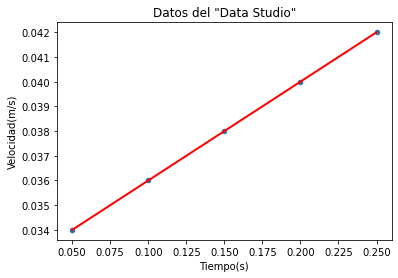

In [283]:
#Gráfica de los datos y su linea de ajuste correspondiente al simulador "Data Studio"
%matplotlib inline
data.plot(kind='scatter',x='Tiempo(s)',y='Velocidad(m/s)')
plt.plot((data['Tiempo(s)']),pd.DataFrame(data['prediction']), c= 'red',linewidth=2)
plt.title('Datos del "Data Studio"')
plt.plot()

[]

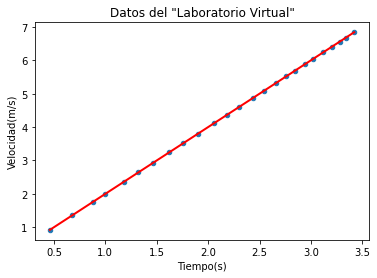

In [284]:
#Gráfica de los datos y su linea de ajuste correspondiente al simulador "Laboratorio Virtual"
%matplotlib inline
data2.plot(kind='scatter',x='Tiempo(s)',y='Velocidad(m/s)')
plt.plot((data2['Tiempo(s)']),pd.DataFrame(data2["prediction"]), c= 'red',linewidth=2)
plt.title('Datos del "Laboratorio Virtual"')
plt.plot()

[]

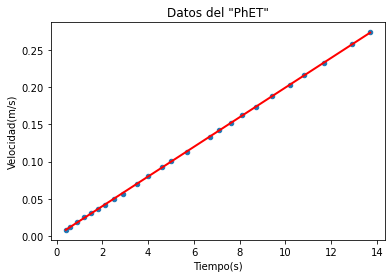

In [285]:
#Gráfica de los datos y su linea de ajuste correspondiente al simulador "PhET"
%matplotlib inline
data3.plot(kind='scatter',x='Tiempo(s)',y='Velocidad(m/s)')
plt.plot(pd.DataFrame(data3['Tiempo(s)']),pd.DataFrame(data3["prediction"]), c= 'red',linewidth=2)
plt.title('Datos del "PhET"')
plt.plot()